# Install Environment

In [ ]:
# لو قابلك مشكله في التسطيب نفذ السطر ده واعمل ريستارت للرن تايم
!pip install sentencepiece

!pip install transformers
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline,AutoTokenizer,AutoModelForSeq2SeqLM,AutoModelForCausalLM,BartTokenizer
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Read Data

In [ ]:
df = pd.read_csv ("https://raw.githubusercontent.com/AnasElbattra/Spam-Ham-Classification/main/MN-DS-news-classification%20(1).csv")

In [ ]:
df = df.rename(columns={'category_level_1': 'category_1', 'category_level_2': 'category_2'})

In [ ]:
df

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [ ]:
def sample_rows(group):
    return group.sample(min(len(group), 50))

# Selecting 50 random rows from each category
sampled_df = df.groupby('category_1', group_keys=False).apply(sample_rows)
sampled_df = sampled_df[['title', 'content', 'category_1', 'category_2']]
sampled_df


,title,content,category_1,category_2
1500,Middle Ages Merlin manuscript found in Bristol...,Fragments of a manuscript from the Middle Ages...,"arts, culture, entertainment and media",culture
1218,'We're Building Project That Will Make Saudi A...,"Michael Reininger, chief executive officer of ...","arts, culture, entertainment and media",arts and entertainment
1306,Alderman kills Lincoln Yards’ soccer stadium a...,Ald. Brian Hopkins (2nd) on Tuesday put the ki...,"arts, culture, entertainment and media",arts and entertainment
1213,‘PP’s Secret Weapon’: WashPost Magazine Reveal...,It’s no secret that Hollywood relishes includi...,"arts, culture, entertainment and media",arts and entertainment
1314,POKEMON turns 'sleep into entertainment'...,A new Pokémon app called Pokémon Sleep is in d...,"arts, culture, entertainment and media",arts and entertainment
...,...,...,...,...
4852,UK weather forecast: severe Met Office warning...,A severe weather warning for snow is in place ...,weather,weather forecast
3980,UK weather forecast: Severe weather warning fo...,Another severe weather warning for ice is in p...,weather,weather warning
4855,UK weather forecast: 30C heatwave warning afte...,Torrential thunderstorms saw a week’s worth of...,weather,weather forecast
4061,Heavy rain to batter Scotland as forecasters i...,Heavy rain is expected to batter large parts o...,weather,weather warning


## Constants

In [ ]:
max_length = 100
min_length = 10
candidate_labels = ['crime, law and justice', 'arts, culture, entertainment and media',
       'economy, business and finance',
       'disaster, accident and emergency incident', 'environment',
       'education', 'health', 'human interest', 'lifestyle and leisure',
       'politics', 'labour', 'religion and belief',
       'science and technology', 'society', 'sport',
       'conflict, war and peace', 'weather']

## Models

In [ ]:
# التلخيص بتاعة وحش
# summarize_model_id = "ybagoury/flan-t5-base-tldr_news"
# summarize_model_id ="facebook/bart-large-cnn"
# summarize_model_id ="fgoogle/pegasus-multi_news"

# tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
# summarizer_model = pipeline("summarization", model=summarize_model_id, max_length=max_length, min_length=min_length)
classifier_small = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-small')
classifier_large = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-large')
classifier_base = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-base')


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def compute_classification_report(true_labels_column, predicted_labels_column):
    y_true = sampled_df[true_labels_column]
    y_pred = sampled_df[predicted_labels_column]
    report = classification_report(y_true, y_pred)
    print(predicted_labels_column)
    print(report)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy


In [ ]:
sampled_df["predict_small"] = sampled_df['title'].apply(lambda x: classifier_small(x,candidate_labels)["labels"][0])
print("deberta small accuracy: \n")
small_accuracy = compute_classification_report('category_1','predict_small')


predict_small
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.33      0.14      0.20        50
                  conflict, war and peace       0.57      0.08      0.14        50
                   crime, law and justice       0.67      0.12      0.20        50
disaster, accident and emergency incident       0.42      0.20      0.27        50
            economy, business and finance       0.71      0.20      0.31        50
                                education       0.68      0.42      0.52        50
                              environment       0.22      0.48      0.30        50
                                   health       0.40      0.20      0.27        50
                           human interest       0.17      0.48      0.25        50
                                   labour       0.55      0.42      0.48        50
                    lifestyle and leisure       0.89      0.16      0.27

In [ ]:
sampled_df["predict_base"] = sampled_df['title'].apply(lambda x: classifier_base(x,candidate_labels)["labels"][0])
print('\n\ndeberta base accuracy: \n')
base_accuracy = compute_classification_report('category_1','predict_base')



deberta base accuracy: 

predict_base
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.25      0.02      0.04        50
                  conflict, war and peace       0.69      0.22      0.33        50
                   crime, law and justice       0.67      0.04      0.08        50
disaster, accident and emergency incident       0.47      0.14      0.22        50
            economy, business and finance       1.00      0.02      0.04        50
                                education       0.83      0.58      0.68        50
                              environment       0.36      0.34      0.35        50
                                   health       0.38      0.22      0.28        50
                           human interest       0.09      0.72      0.16        50
                                   labour       0.24      0.10      0.14        50
                    lifestyle and leisure     

In [ ]:
sampled_df["predict_large"] = sampled_df['title'].apply(lambda x: classifier_large(x,candidate_labels)["labels"][0])
print('\n\ndeberta large accuracy: \n')
large_accuracy = compute_classification_report('category_1','predict_large')



deberta large accuracy: 

predict_large
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.67      0.08      0.14        50
                  conflict, war and peace       0.89      0.16      0.27        50
                   crime, law and justice       0.67      0.20      0.31        50
disaster, accident and emergency incident       0.64      0.32      0.43        50
            economy, business and finance       0.64      0.64      0.64        50
                                education       0.76      0.58      0.66        50
                              environment       0.73      0.48      0.58        50
                                   health       0.49      0.70      0.58        50
                           human interest       0.13      0.72      0.23        50
                                   labour       0.66      0.54      0.59        50
                    lifestyle and leisure   

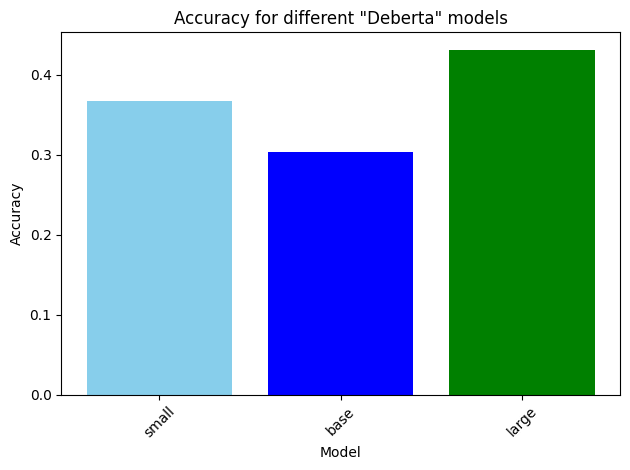

In [ ]:
import matplotlib.pyplot as plt

# Model labels
models = ["small","base","large"]

# Accuracy values
accuracies = [small_accuracy, base_accuracy, large_accuracy]

# Create a color list to distinguish between 'summ' and non-summ models
colors = ['skyblue', 'blue', 'green']

# Create the bar plot
plt.bar(models, accuracies, color=colors)

plt.title('Accuracy for different "Deberta" models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 97% data without summarization

##Title

In [ ]:
df = pd.read_csv ("/content/data.csv")
df = df[['title', 'text', 'label']]
df = df.replace({0: 'fake', 1: 'real'})
df

,title,text,label
0,FORMER U.S. ATTORNEY: “It’s VERY Clear Intel C...,JOE DIGENOVA has been around D.C for decades a...,fake
1,Rick Santorum Advises President To Quit Tweet...,"In a recent interview with CNN, former senator...",fake
2,Stephen Colbert Explains The Horrifying Futur...,"With only three clowns left in GOP clown car, ...",fake
3,Nepal votes in final round of polls at the end...,KATHMANDU (Reuters) - Nepalis began voting in ...,real
4,"More Americans think wealthy, not middle class...",WASHINGTON (Reuters) - Americans are more like...,real
...,...,...,...
8112,Opposition leader says Brexit must not be used...,"BRUSSELS (Reuters) - Jeremy Corbyn, leader of ...",real
8113,‘Pro-Life’ Scott Walker Just Signed Two Bills...,Republicans always talk a big game about being...,fake
8114,LIBERAL HUMOR? FLORIDA BAR POSTS SIGN Suggesti...,It s a federal offense to threaten a president...,fake
8115,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,real


In [ ]:
df_small = df.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))
df_small

,title,text,label
0,FORMER U.S. ATTORNEY: “It’s VERY Clear Intel C...,JOE DIGENOVA has been around D.C for decades a...,fake
7392,New RNC Hispanic Outreach Head’s Humiliating ...,"Somebody alert Mike Rowe, the dirtiest job in ...",fake
1925,Unreal! Clueless Media Misses This VIP Anarchi...,No wonder Obama wasn t vetted! Here s a FOX ne...,fake
928,NOT FUNNY! DRUDGE Calls Out Comedian #KathyGri...,Kathy Griffin probably thought this would be g...,fake
3289,HILLARY’S VP NOMINEE PANDERS TO BLACKS: “I don...,"Yes, he did say that bad grammar and all! Can ...",fake
...,...,...,...
2322,Obama hopes for quick party healing after 'ouc...,NEW YORK (Reuters) - President Barack Obama sa...,real
7171,Protesters gather in Kiev after police recaptu...,KIEV (Reuters) - Ukrainian police recaptured t...,real
6621,Aide to Ivory Coast parliament speaker arreste...,ABIDJAN (Reuters) - Ivory Coast authorities ar...,real
2864,Going strong after 70 years: UK's Queen Elizab...,LONDON (Reuters) - Britain s Queen Elizabeth w...,real


In [ ]:
candidate_labels = ['fake', 'real']

In [ ]:
classifier_small = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-small')
classifier_large = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-large')
classifier_base = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-base')

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def compute_classification_report(true_labels_column, predicted_labels_column):
    y_true = df_small[true_labels_column]
    y_pred = df_small[predicted_labels_column]
    report = classification_report(y_true, y_pred)
    print(predicted_labels_column)
    print(report)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy


In [ ]:
df_small["small_title"] = df_small['title'].apply(lambda x: classifier_small(x,candidate_labels)["labels"][0])
print("deberta small accuracy: \n")
small_accuracy = compute_classification_report('label','small_title')

deberta small accuracy: 

small_title
              precision    recall  f1-score   support

        fake       0.70      0.62      0.66        50
        real       0.66      0.74      0.70        50

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [ ]:
df_small["base_title"] = df_small['title'].apply(lambda x: classifier_base(x,candidate_labels)["labels"][0])
print('\n\ndeberta base accuracy: \n')
base_accuracy = compute_classification_report('label','base_title')



deberta base accuracy: 

base_title
              precision    recall  f1-score   support

        fake       0.82      0.18      0.30        50
        real       0.54      0.96      0.69        50

    accuracy                           0.57       100
   macro avg       0.68      0.57      0.49       100
weighted avg       0.68      0.57      0.49       100



In [ ]:
df_small["large_title"] = df_small['title'].apply(lambda x: classifier_large(x,candidate_labels)["labels"][0])
print('\n\ndeberta large accuracy: \n')
large_accuracy = compute_classification_report('label','large_title')



deberta large accuracy: 

large_title
              precision    recall  f1-score   support

        fake       0.70      0.32      0.44        50
        real       0.56      0.86      0.68        50

    accuracy                           0.59       100
   macro avg       0.63      0.59      0.56       100
weighted avg       0.63      0.59      0.56       100



## text

In [ ]:
df_small["small_text"] = df_small['text'].apply(lambda x: classifier_small(x,candidate_labels)["labels"][0])
print("deberta small accuracy: \n")
small_accuracy = compute_classification_report('label','small_text')

deberta small accuracy: 

small_text
              precision    recall  f1-score   support

        fake       0.79      0.46      0.58        50
        real       0.62      0.88      0.73        50

    accuracy                           0.67       100
   macro avg       0.71      0.67      0.65       100
weighted avg       0.71      0.67      0.65       100



In [ ]:
df_small["base_text"] = df_small['text'].apply(lambda x: classifier_base(x,candidate_labels)["labels"][0])
print('\n\ndeberta base accuracy: \n')
base_accuracy = compute_classification_report('label','base_text')



deberta base accuracy: 

base_text
              precision    recall  f1-score   support

        fake       0.56      0.30      0.39        50
        real       0.52      0.76      0.62        50

    accuracy                           0.53       100
   macro avg       0.54      0.53      0.50       100
weighted avg       0.54      0.53      0.50       100



In [ ]:
df_small["large_text"] = df_small['text'].apply(lambda x: classifier_large(x,candidate_labels)["labels"][0])
print('\n\ndeberta large accuracy: \n')
large_accuracy = compute_classification_report('label','large_text')



deberta large accuracy: 

large_text
              precision    recall  f1-score   support

        fake       0.70      0.28      0.40        50
        real       0.55      0.88      0.68        50

    accuracy                           0.58       100
   macro avg       0.62      0.58      0.54       100
weighted avg       0.62      0.58      0.54       100



# with summarization

In [ ]:
df_small['num_tokens'] = df_small['text'].apply(lambda x: len(tokenizer.encode(x)))

df_small = df_small[df_small['num_tokens'] <= 1024]

Token indices sequence length is longer than the specified maximum sequence length for this model (1848 > 1024). Running this sequence through the model will result in indexing errors


### install and initialize summarization

In [ ]:
!pip install sentencepiece
!pip install transformers
!pip install einops
!pip install rouge


In [ ]:
from transformers import pipeline,AutoTokenizer,AutoModelForSeq2SeqLM,AutoModelForCausalLM,BartTokenizer
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# التلخيص بتاعة وحش
# flan_t5_base = "ybagoury/flan-t5-base-tldr_news"
bart_large ="facebook/bart-large-cnn"
# pegasus ="fgoogle/pegasus-multi_news"

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
summarizer_model = pipeline("summarization", model=bart_large, max_length=70, min_length=10)

In [ ]:
def getSummary(text):
  # input_ids = tokenizer.encode(text, return_tensors="pt")

  # # Generate Summary Text Ids
  # summary_text_ids = model_summarize.generate(
  #     input_ids=input_ids,
  #     bos_token_id=model_summarize.config.bos_token_id,
  #     eos_token_id=model_summarize.config.eos_token_id,
  #     length_penalty=2.0,
  #     max_length=142,
  #     min_length=30,
  #     num_beams=4,
  # )

  # text_summarized=summary_text_ids[0]
  # print(tokenizer.decode(text_summarized, skip_special_tokens=True))
  text_summarized = summarizer_model(text)[0]['summary_text']

  # print(len(text_summarized.split()))
  # print(text_summarized)
  # print("----------------------")
  return text_summarized

### Summarize

In [ ]:
df_small['summary_text'] = df_small['text'].apply(getSummary)

Your max_length is set to 70, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 70, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 70, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)
Your max_length is set to 70, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_le

In [ ]:
df_small["small_summary"] = df_small['summary_text'].apply(lambda x: classifier_small(x,candidate_labels)["labels"][0])
print("deberta small accuracy: \n")
small_accuracy = compute_classification_report('label','small_summary')

deberta small accuracy: 

small_summary
              precision    recall  f1-score   support

        fake       0.74      0.51      0.61        45
        real       0.65      0.84      0.73        49

    accuracy                           0.68        94
   macro avg       0.70      0.67      0.67        94
weighted avg       0.69      0.68      0.67        94



<ipython-input-48-3cc3704d1220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["small_summary"] = df_small['summary_text'].apply(lambda x: classifier_small(x,candidate_labels)["labels"][0])


In [ ]:
df_small["base_summary"] = df_small['summary_text'].apply(lambda x: classifier_base(x,candidate_labels)["labels"][0])
print('\n\ndeberta base accuracy: \n')
base_accuracy = compute_classification_report('label','base_summary')



deberta base accuracy: 

base_summary
              precision    recall  f1-score   support

        fake       0.62      0.29      0.39        45
        real       0.56      0.84      0.67        49

    accuracy                           0.57        94
   macro avg       0.59      0.56      0.53        94
weighted avg       0.59      0.57      0.54        94



<ipython-input-49-bf1a7c0c797f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["base_summary"] = df_small['summary_text'].apply(lambda x: classifier_base(x,candidate_labels)["labels"][0])


In [ ]:
df_small["large_summary"] = df_small['summary_text'].apply(lambda x: classifier_large(x,candidate_labels)["labels"][0])
print('\n\ndeberta large accuracy: \n')
large_accuracy = compute_classification_report('label','large_summary')



deberta large accuracy: 

large_summary
              precision    recall  f1-score   support

        fake       0.76      0.36      0.48        45
        real       0.60      0.90      0.72        49

    accuracy                           0.64        94
   macro avg       0.68      0.63      0.60        94
weighted avg       0.68      0.64      0.61        94



<ipython-input-50-263f19b26777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["large_summary"] = df_small['summary_text'].apply(lambda x: classifier_large(x,candidate_labels)["labels"][0])
